
---
# Current Chapter ...
[Local](./probCh03.ipynb),
[Github](https://github.com/renyuanL/_ryProb2020/blob/master/probCh03.ipynb),
[Colab](https://colab.research.google.com/github/renyuanL/_ryProb2020/blob/master/probCh03.ipynb)

[textBook](https://changgunguniversity-my.sharepoint.com/personal/d000000461_cgu_edu_tw/Documents/__ryGithub2020/probability_and_statistics_for_engineers_and_scientisst__9thEd.pdf),
[ppt](https://changgunguniversity-my.sharepoint.com/personal/d000000461_cgu_edu_tw/Documents/__ryGithub2020/_ryProb2020/ppt/probCh03_%E7%AC%AC%203%20%E7%AB%A0%20%E4%B8%80%E4%BA%9B%E6%A9%9F%E7%8E%87%E5%88%86%E5%B8%83.pdf)

----

# Ch03

----

# Some Probability Distribution



## Introduction and Motivation

No matter whether a discrete probability distribution is represented graphically by a histogram, in tabular form, or by means of a formula, the behavior of a random variable is described. 

Often, the observations generated by different statistical experiments have the same general type of behavior. 

Consequently, discrete random variables associated with these experiments can be described by essentially the same probability distribution and therefore can be `represented by a single formula`. 

In fact, one needs only a handful of important probability distributions to describe many of the discrete random variables encountered in practice. 

Such a handful of distributions describe several real-life random phenomena. 

- For instance, in a study involving testing the effectiveness of a new drug, the number of cured patients among all the patients who use the drug approximately follows a `Binomial` distribution (Section b5.2, s3.2). 

- In an industrial example, when a sample of items selected from a batch of production is tested, the number of defective items in the sample usually can be modeled as a `HyperGeometric` random variable (Section b5.3, s3.3). 

- In a statistical quality control problem, the experimenter will signal a shift of the process mean when observational data exceed certain limits. 

- The number of samples required to produce a false alarm follows a `Geometric` distribution which is a special case of the `Negative Binomial` distribution (Section b5.4, s3.4). 

- On the other hand, the number of white cells from a fixed amount of an individual’s blood sample is usually random and may be described by a `Poisson` distribution (Section b5.5, s3.5). 

In this chapter, we present these commonly used distributions with various examples.


![] (media/Ch03/image6.png) <div style="text-align: right">【p03.000】</div>

![](media/Ch03/image7.png) <div style="text-align: right">【p03.001】</div>

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pl

import scipy.stats as st


# 實數小數點後位數少一點以利觀看
import numpy as np
#np.set_printoptions(precision=3,suppress=True)

np.set_printoptions(suppress=True)



In [3]:
comb= sp.special.comb
n=10
x= np.arange(0,n+1)
c= comb(n,x)
x, c

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  1.,  10.,  45., 120., 210., 252., 210., 120.,  45.,  10.,   1.]))

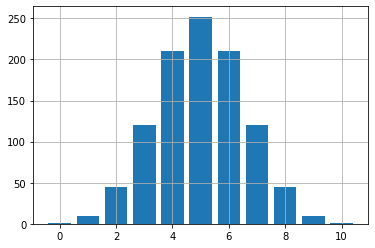

In [4]:
pl.bar(x,c); pl.grid('on')

In [5]:
def binom(x,n,p):
    prob= comb(n,x) * p**x * (1-p)**(n-x)
    return prob

b=binom(x, n=10, p=.5)
x,b

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0.00097656, 0.00976562, 0.04394531, 0.1171875 , 0.20507812,
        0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976562,
        0.00097656]))

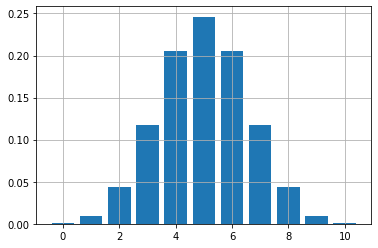

In [6]:
pl.bar(x,b); pl.grid('on')


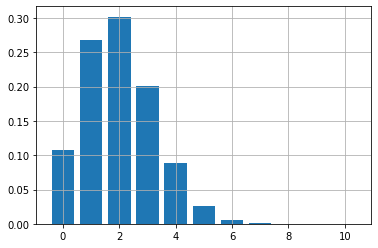

In [7]:
b=binom(x, n=10, p=.2)
pl.bar(x,b); pl.grid('on')

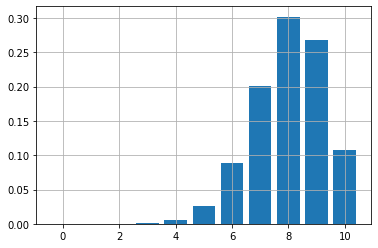

In [8]:
b=binom(x, n=10, p=.8)
pl.bar(x,b); pl.grid('on')

In [9]:
# 查看 st 中的 binom, 功能強大！

st.binom?

Notes
-----

The probability mass function,`pmf`, for `binom` is:

- $   f(k) = \binom{n}{k} p^k (1-p)^{n-k} $

- $   k \in \{0, 1,..., n\}. $

`binom` takes `n` and `p` as shape parameters.


In [10]:
st.binom??

In [11]:
st.binom.pmf?
st.binom.pmf??

In [12]:
st.binom.pmf(0,n=10,p=.5)

0.0009765625

In [13]:
n= 10
p= .5
x= np.arange(0,n+1)

binomPmf= st.binom.pmf(x, n, p)

x, binomPmf

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
        0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
        0.00097656]))

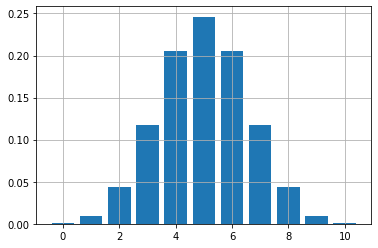

In [14]:
pl.bar(x,binomPmf)
pl.grid('on')

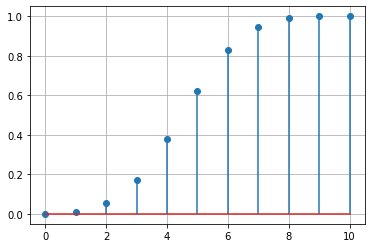

In [15]:
binomCdf= st.binom.cdf(x, n, p)

pl.stem(x,binomCdf, use_line_collection=True)

pl.grid('on')


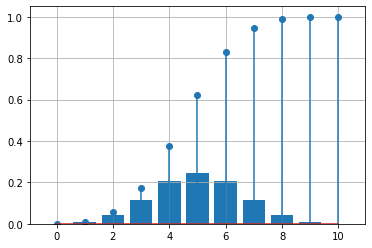

In [16]:
pl.bar(x,binomPmf)
pl.stem(x,binomCdf, use_line_collection=True)
pl.grid('on')


In [17]:
st.binom.stats(n=10, p= .5, moments= 'mvsk') # mean, var, skew, kurt


(array(5.), array(2.5), array(0.), array(-0.2))

In [18]:
st.binom.interval(alpha= .95, n=10, p=.5)

(2.0, 8.0)

In [19]:
st.binom.pmf(k= [2,3,4,5,6,7,8], n=10, p=.5).sum()

0.9785156250000009

# Ref: 

Binomial distribution
====

出自Wikipedia
----

https://en.wikipedia.org/wiki/Binomial_distribution


![](media/Ch03/image8.png) <div style="text-align: right">【p03.002】</div>

----
### Ex 3.1:

The probability that a certain kind of component will 【survive】 a *shock test* is 【3/4】.

Find the ```probability``` 

```that exactly 【2】 of the next 【4】 components tested 【survive】```.

----

### [rySol 3.1]

$
b
\left( 
    k= 2; 
    n= 4, 
    p= \frac{3}{4} 
\right)
\\\\
=
\binom{4}{2}
*
\left(
    \frac{3}{4}
\right)^2
*
\left(
    \frac{1}{4}
\right)^2
\\\\
=
\left(
    \frac{4!}{2! 2!}
\right)
*
\left(
    \frac{3^2}{4^4}
\right)
\\\\
=
\frac{27}{128}
\\\\
= 0.2109
$

In [20]:
# [rySol 3.1]

st.binom.pmf(k=2, n= 4, p=3/4)

0.21093750000000006

In [21]:
# just using python as a calclulator ...

ans1= 27/128

ans2= comb(4,2) * (3/4)**2 * (1/4)**2

fact= sp.special.factorial

ans3= fact(4)/fact(2)/fact(2) * 3**2 / 4**4

ans1, ans2, ans3

(0.2109375, 0.2109375, 0.2109375)

![](media/Ch03/image18.png) <div style="text-align: right">【p03.003】</div>

### Example 3.2:
    
The 【probability】 that a patient 【recovers】 from a rare blood disease is 【0.4】. 

If 【15】 people are known to have contracted this disease, 
what is the probability that 
- (a) ```at least 10``` 【survive】 
- (b) ```from 3 to 8``` survive
- (c) ```exactly 5``` survive



### 【rySol 3.2】

* 康復機率 p= .4
* 患病人數 n= 15
* 康復人數 (隨機變數): X
----
- (a) "at least 10" == " X>=10"
- (b) "from 3 to 8" == "3 <= X <= 8"
- (c) "exactly 5" == " X==5 "
----

(a)

" X>=10".prob =

$
P("X \ge 10")\\\\
=  \sum_{x=10}^{15} binom(x;n,p)
$

(b)

" 3 <= X <= 8".prob =

$
P("3 \le X \le 8")\\\\
=  \sum_{x=3}^{8} binom(x;n,p)
$

(c)

" X == 5".prob =

$
P("X == 5")\\\\
=  binom(x=5;n,p)
$


In [22]:
# (a)
st.binom.pmf(k=[10,11,12,13,14,15], n=15, p=.4)

array([0.02448564, 0.00741989, 0.00164886, 0.00025367, 0.00002416,
       0.00000107])

In [23]:
st.binom.pmf(k=[10,11,12,13,14,15], n=15, p=.4).sum()

0.033833302884352094

In [24]:
# (b)
st.binom.pmf(k=[3,4,5,6,7,8], n=15, p=.4).sum()

0.8778385910661144

In [25]:
# (c)
st.binom.pmf(k=5, n=15, p=.4)

0.18593784476467232

![](media/Ch03/image19.png) <div style="text-align: right">【p03.004】</div>
![](media/Ch03/image20.png) <div style="text-align: right">【p03.005】</div>

![](media/Ch03/image21.png) <div style="text-align: right">【p03.006】</div>


## Th 3.1


![](media/Ch03/image22.png) <div style="text-align: right">【p03.007】</div>


### ryPf 3.1

----

#### Mean and Variance of Binomial Random Variables


http://www.math.ubc.ca/~feldman/m302/binomial.pdf

----

#### The Binomial Distribution: Mathematically Deriving the Mean and Variance
@ youTube

2 種 證明方式，簡單vs複雜。

觀看時記得打開字幕。

https://youtu.be/8fqkQRjcR1M



### 【ryPf0301】

![](fg/fg_ryPf0301_1.png)
![](fg/fg_ryPf0301_2.png)
![](fg/fg_ryPf0301_3.png)
![](fg/fg_ryPf0301_4.png)
![](fg/fg_ryPf0301_5.png)
![](fg/fg_ryPf0301_6.png)


![](media/Ch03/image23.png) <div style="text-align: right">【p03.008】</div>

In [26]:
# (a) 'X==3'.prob=
st.binom.pmf(k=3, n=10, p=.3)

0.26682793200000005

In [27]:
# (b) 'X>3'.prob=
st.binom.sf(k=3, n=10, p=.3)

0.35038928159999955

![](media/Ch03/image24.png) <div style="text-align: right">【p03.009】</div>

In [28]:
# "X==6".prob=
st.binom.pmf(k=6, n=10, p=.30)

0.03675690899999997

In [29]:
# "X>6".prob=
st.binom.pmf(k=[7,8,9,10], n=10, p=.30).sum()

0.010592078399999993

In [30]:
st.binom.sf(k=6, n=10, p=.30) # k > 6 (不含 6)

0.0105920784

In [31]:
# "X>=6".prob=
st.binom.sf(k=5, n=10, p=.30) # k > 5 (不含 5)

0.04734898739999995

### 【rySol 3.5】

解釋一下上面計算的意義：

在這個計算過程中，
我們有個最初的【假設】

$H_0$: "30% 的水井有雜質"，

然後根據機率論的嚴謹數學邏輯計算出

P("X==6") == .0368

P("X>=6") == .0473

不管 .0368 或是 .0473,
一般人的認知都可視為 很小 的機率值。
也就是不大可能會發生。

然而，實驗結果是 它 ($"X\ge6"$, 也就是所謂的【證據】) 確實發生了！！

因此，一個合理的推論是：

最初的【假設】 $H_0$ 有問題，

它 ($H_0$) 很大的可能是

【虛假的】、【錯誤的】、【不真實的】！！！

----

上述 P("X>=6") == .0473 更嚴謹的寫法是採用條件機率的表示法：

P("X>=6" | " H0: p== .30 ") == .0473

亦即 假設 H0: "p== .30" 的條件下， 

"X>=6" 這個證據會發生的機率(經嚴密的數學計算) 為 .0473 (此值很小)。

但現實卻是 這個證據 "X>=6" 確實發生了！！

根據正常人的邏輯：

1. "若 p 則 q"  === " 若 ~q 則 ~p"
2. "若 p 則 ~q" === " 若 q 則 ~p"

3. "若 【假設為真】 則 【證據不發生】" === "若 【證據有發生】 則 【假設不為真】"
4. "若 【你沒殺人】 則 【兇刀不會在你手上】" === "若 【兇刀在你手上】 則 【你沒殺人】不為真"

5. 
"若 【你沒殺人】 則 【兇刀會在你手上 ```機率很小```" 
=== "若 【兇刀確實在你手上】 則 【你沒殺人 ```機率很小```】"



In [32]:
# (b) 'X>3|H0: p=.3'.prob=
st.binom.sf(k=3, n=10, p=.3)

0.35038928159999955

In [33]:
# (b) 'X>4|H0: p=.3'.prob=
st.binom.sf(k=4, n=10, p=.3)

0.15026833259999994

In [34]:
# (b) 'X>5|H0: p=.3'.prob=
st.binom.sf(k=5, n=10, p=.3)

0.04734898739999995

In [35]:
# (b) 'X>6|H0: p=.3'.prob=
st.binom.sf(k=6, n=10, p=.3)

0.0105920784

In [36]:
# (b) 'X>7|H0: p=.3'.prob=
st.binom.sf(k=7, n=10, p=.3)


0.0015903863999999993

In [37]:
# (b) 'X>7|H0: p=.4'.prob=
st.binom.sf(k=7, n=10, p=.4)

0.012294553600000008

In [38]:
# (b) 'X>7|H0: p=.5'.prob=
st.binom.sf(k=7, n=10, p=.5)

0.054687500000000014

In [39]:
# (b) 'X>7|H0: p=.5'.prob=
st.binom.sf(k=7, n=10, p=.6)

0.16728975360000004

In [40]:
# 把各種情境 一次性的 計算：
p= [.3, .4, .5, .6, .7, .8]

# (b) 'X>7|H0: p= p'.prob=
st.binom.sf(k=7, n=10, p= p)

array([0.00159039, 0.01229455, 0.0546875 , 0.16728975, 0.38278279,
       0.67779953])

In [41]:
# 把各種情境 一次性的 計算：
p= [.3, .4, .5, .6, .7, .8]
k= [3, 4, 5, 6, 7, 8]

# (b) 'X>k|H0: p= p'.prob=
st.binom.sf(k= k, n=10, p= p)

array([0.35038928, 0.36689674, 0.37695313, 0.3822806 , 0.38278279,
       0.37580964])

In [42]:
# 把各種情境 一次性的 計算：
p= [.3, .4, .5, .6, .7, .8]
k= [3, 4, 5, 6, 7,8]

p=np.array(p).reshape(-1,1) # 垂直型 2軸陣列 pN x 1
k=np.array(k).reshape(1,-1) # 水平型 2軸陣列 1 x kN

p, k

(array([[0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8]]), array([[3, 4, 5, 6, 7, 8]]))

In [43]:
# (b) 'X>k|H0: p= p'.prob=
st.binom.sf(k= k, n=10, p= p) # 平面型 2軸陣列 pN x kN

array([[0.35038928, 0.15026833, 0.04734899, 0.01059208, 0.00159039,
        0.00014369],
       [0.6177194 , 0.36689674, 0.16623862, 0.05476188, 0.01229455,
        0.00167772],
       [0.828125  , 0.62304687, 0.37695313, 0.171875  , 0.0546875 ,
        0.01074219],
       [0.94523812, 0.83376138, 0.63310326, 0.3822806 , 0.16728975,
        0.0463574 ],
       [0.98940792, 0.95265101, 0.84973167, 0.64961072, 0.38278279,
        0.14930835],
       [0.99913564, 0.99363062, 0.9672065 , 0.87912612, 0.67779953,
        0.37580964]])

In [44]:
# 實數小數點後位數少一點以利觀看

import numpy as np
np.set_printoptions(precision=3, suppress=True)


In [45]:
np.set_printoptions?

In [46]:
# (b) 'X>k|H0: p= p'.prob=
st.binom.sf(k= k, n=10, p= p) # 平面型 2軸陣列 pN x kN


array([[0.35 , 0.15 , 0.047, 0.011, 0.002, 0.   ],
       [0.618, 0.367, 0.166, 0.055, 0.012, 0.002],
       [0.828, 0.623, 0.377, 0.172, 0.055, 0.011],
       [0.945, 0.834, 0.633, 0.382, 0.167, 0.046],
       [0.989, 0.953, 0.85 , 0.65 , 0.383, 0.149],
       [0.999, 0.994, 0.967, 0.879, 0.678, 0.376]])

In [47]:
_='''     k=3    k=4     k=5       k=6      k=7      k=8
p=.3 ==> [0.35 , 0.15 , 【0.047】, 0.011,   0.002,   0.   ],
p=.4 ==> [0.618, 0.367,   0.166,   0.055, 【0.012】, 0.002],
p=.5 ==> [0.828, 0.623,   0.377,   0.172,   0.055, 【0.011】],
p=.6 ==> [0.945, 0.834,   0.633,   0.382,   0.167, 【0.046】],
p=.7 ==> [0.989, 0.953,   0.85 ,   0.65 ,   0.383,   0.149],
p=.8 ==> [0.999, 0.994,   0.967,   0.879,   0.678,   0.376]])
'''
# 如果 大家同意 機率值 在 【0.05】 以下，可算是 【小】
# 那麼， 
# 當 p= .3 時， 'X>5'.prob = .047 才算【小】，才能據以 【否決】假設 p= .3
# 當 p= .4 時， 'X>7'.prob = .012 才算【小】。才能據以 【否決】假設 p= .4
# 當 p= .5 時， 'X>8'.prob = .011 才算【小】。才能據以 【否決】假設 p= .5
# 當 p= .6 時， 'X>8'.prob = .046 才算【小】。才能據以 【否決】假設 p= .6

![](media/Ch03/image25.png) <div style="text-align: right">【p03.010】</div>

![](media/Ch03/image29.png) <div style="text-align: right">【p03.012】</div>

![](media/Ch03/image28.png) <div style="text-align: right">【p03.011】</div>

In [48]:
st.multinomial.pmf?

$$
f(x_1, x_2, ..., x_k) = \frac{n!}{x_1! \cdots x_k!} p_1^{x_1} \cdots p_k^{x_k}
$$

In [49]:
st.multinomial.pmf(x= [2,1,3], p= [2/9, 1/6, 11/18], n= 6)

0.11270300936510357

In [50]:
#
# generate all possible X=[x1,x2,x3]
#
n= 6
X= [(x1,x2,x3) 
 for x1 in range(n+1) 
 for x2 in range(n+1) 
 for x3 in range(n+1)
 if x1+x2+x3==n]
X= np.array(X)
X.shape, X

((28, 3), array([[0, 0, 6],
        [0, 1, 5],
        [0, 2, 4],
        [0, 3, 3],
        [0, 4, 2],
        [0, 5, 1],
        [0, 6, 0],
        [1, 0, 5],
        [1, 1, 4],
        [1, 2, 3],
        [1, 3, 2],
        [1, 4, 1],
        [1, 5, 0],
        [2, 0, 4],
        [2, 1, 3],
        [2, 2, 2],
        [2, 3, 1],
        [2, 4, 0],
        [3, 0, 3],
        [3, 1, 2],
        [3, 2, 1],
        [3, 3, 0],
        [4, 0, 2],
        [4, 1, 1],
        [4, 2, 0],
        [5, 0, 1],
        [5, 1, 0],
        [6, 0, 0]]))

In [51]:
# x1+x2+x3==6 
# 0<= x1, x2, x3 <=6
# 所有解(x1,x2,x3) 的個數 =
# 1 1 + 1 1 + 1 1 : 6 個 1, 2 個 + 的排列總數 =
# (6+2)! / (2! 6!) =
# comb(8, 2) = (8*7)/(2*1) = 28


In [52]:
# Calculate the pmf for all possible combinations of (x1,x2,x3)

n= 6
p= [2/9, 1/6, 11/18]
P= st.multinomial.pmf(x= X, p= p, n=n)
XP= np.hstack((X, P.reshape(-1,1)))

P, XP

(array([0.052, 0.085, 0.058, 0.021, 0.004, 0.   , 0.   , 0.114, 0.155,
        0.085, 0.023, 0.003, 0.   , 0.103, 0.113, 0.046, 0.008, 0.001,
        0.05 , 0.041, 0.011, 0.001, 0.014, 0.007, 0.001, 0.002, 0.001,
        0.   ]), array([[0.   , 0.   , 6.   , 0.052],
        [0.   , 1.   , 5.   , 0.085],
        [0.   , 2.   , 4.   , 0.058],
        [0.   , 3.   , 3.   , 0.021],
        [0.   , 4.   , 2.   , 0.004],
        [0.   , 5.   , 1.   , 0.   ],
        [0.   , 6.   , 0.   , 0.   ],
        [1.   , 0.   , 5.   , 0.114],
        [1.   , 1.   , 4.   , 0.155],
        [1.   , 2.   , 3.   , 0.085],
        [1.   , 3.   , 2.   , 0.023],
        [1.   , 4.   , 1.   , 0.003],
        [1.   , 5.   , 0.   , 0.   ],
        [2.   , 0.   , 4.   , 0.103],
        [2.   , 1.   , 3.   , 0.113],
        [2.   , 2.   , 2.   , 0.046],
        [2.   , 3.   , 1.   , 0.008],
        [2.   , 4.   , 0.   , 0.001],
        [3.   , 0.   , 3.   , 0.05 ],
        [3.   , 1.   , 2.   , 0.041],
        [3.

In [53]:
# specify dtype as the data field for sorting

XP.dtype=[  ('x1', float),
            ('x2', float),
            ('x3', float),
            ('pmf',float)]
np.sort(XP, axis=0, order=['pmf'])[::-1]

array([[(1., 1., 4., 0.155)],
       [(1., 0., 5., 0.114)],
       [(2., 1., 3., 0.113)],
       [(2., 0., 4., 0.103)],
       [(0., 1., 5., 0.085)],
       [(1., 2., 3., 0.085)],
       [(0., 2., 4., 0.058)],
       [(0., 0., 6., 0.052)],
       [(3., 0., 3., 0.05 )],
       [(2., 2., 2., 0.046)],
       [(3., 1., 2., 0.041)],
       [(1., 3., 2., 0.023)],
       [(0., 3., 3., 0.021)],
       [(4., 0., 2., 0.014)],
       [(3., 2., 1., 0.011)],
       [(2., 3., 1., 0.008)],
       [(4., 1., 1., 0.007)],
       [(0., 4., 2., 0.004)],
       [(1., 4., 1., 0.003)],
       [(5., 0., 1., 0.002)],
       [(4., 2., 0., 0.001)],
       [(3., 3., 0., 0.001)],
       [(2., 4., 0., 0.001)],
       [(5., 1., 0., 0.001)],
       [(0., 5., 1., 0.   )],
       [(1., 5., 0., 0.   )],
       [(6., 0., 0., 0.   )],
       [(0., 6., 0., 0.   )]],
      dtype=[('x1', '<f8'), ('x2', '<f8'), ('x3', '<f8'), ('pmf', '<f8')])

In [54]:
# 隨機產生 size=10 組 (x1,x2,x3)，計算其機率，然後依機率值排序

X10= st.multinomial.rvs(n=n, p=p, size=10)
X10

P10= st.multinomial.pmf(x=X10, n=n, p=p)
P10

XP10= np.hstack((X10, P10.reshape(-1,1)))
XP10

# specify dtype as the data field for sorting

XP10.dtype=[('x1', float),
            ('x2', float),
            ('x3', float),
            ('pmf',float)]
XP10= np.sort(XP10, axis=0, order=['pmf'])[::-1]
XP10

array([[(1., 1., 4., 0.155)],
       [(1., 0., 5., 0.114)],
       [(2., 1., 3., 0.113)],
       [(2., 1., 3., 0.113)],
       [(2., 1., 3., 0.113)],
       [(2., 0., 4., 0.103)],
       [(0., 1., 5., 0.085)],
       [(1., 2., 3., 0.085)],
       [(1., 2., 3., 0.085)],
       [(2., 2., 2., 0.046)]],
      dtype=[('x1', '<f8'), ('x2', '<f8'), ('x3', '<f8'), ('pmf', '<f8')])

----
### 超幾何分布 (Hypergeometric)

![](media/Ch03/image34.png) <div style="text-align: right">【p03.014】</div>



In [55]:
st.hypergeom?

Notes
-----

The symbols used to denote the shape parameters (`M`, `n`, and `N`) are not
universally accepted.  See the Examples for a clarification of the
definitions used here.

The probability mass function is defined as,

.. math:: 

$
p(k, M, n, N) = \frac{\binom{n}{k} \binom{M - n}{N - k}}
                               {\binom{M}{N}}
$

for :math:

$
`k \in [\max(0, N - M + n), \min(n, N)]`, 
$

where the binomial
coefficients are defined as,

.. math:: 

$
\binom{n}{k} \equiv \frac{n!}{k! (n - k)!}.
$

### Hypergeometric distribution

出自Wikipedia


![image.png](fg/fg_HyperGeom_01.png)

![image.png](fg/fg_HyperGeom_02.png)


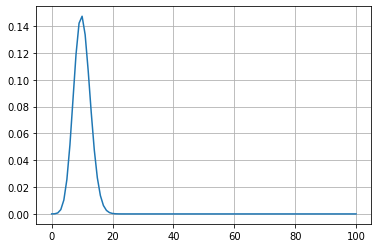

In [56]:
# 'X=0 | N=10,K=2,n=3'.prob=

# popuplation size,  M = 10
# population success size, K
# sample size, n=3
# ----
# sample success number, k (the random variable)

popuSize= 500
succSize= 50
sampSize= 100
k= succNum= np.arange(0, sampSize+1)

# in scipy stats, the 3 params= M, n, N =='popuSize', succSize, sampSize
pmf= st.hypergeom.pmf(k=succNum, M= popuSize, n= succSize, N= sampSize)
pl.plot(k,pmf);pl.grid('on')

![](media/Ch03/image33.png) <div style="text-align: right">【p03.013】</div>

In [57]:
# rySol 3.7

popuSize= 10
succSize= 2 
sampSize= 3

succNum=  X= k= 0

# 
# 'X=0 | N=10, K=2, n=3'.prob=
st.hypergeom.pmf(np.array([0]), 10, np.array([5]),3)

array([0.083])

![](media/Ch03/image35.png) <div style="text-align: right">【p03.015】</div>

![](media/Ch03/image36.png) <div style="text-align: right">【p03.016】</div>

![](media/Ch03/image37.png) <div style="text-align: right">【p03.017】</div>

In [58]:
N= 5000
K= 1000
n=  10
x= np.arange(0,n+1)
pmf= st.hypergeom.pmf(x, N,K,n)
x, pmf

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0.107, 0.268, 0.302, 0.201, 0.088, 0.026, 0.005, 0.001, 0.   ,
        0.   , 0.   ]))

In [59]:
pmf2= st.binom.pmf(x, n= n, p= K/N)
x, pmf2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0.107, 0.268, 0.302, 0.201, 0.088, 0.026, 0.006, 0.001, 0.   ,
        0.   , 0.   ]))

![](media/Ch03/image38.png) <div style="text-align: right">【p03.018】</div>

![](media/Ch03/image41.png) <div style="text-align: right">【p03.019】</div>

### 負二項 分布 (Negative Binomial)

![](media/Ch03/image43.png) <div style="text-align: right">【p03.020】</div>

In [60]:
st.nbinom?

Notes
-----

Negative binomial distribution describes a sequence of i.i.d. Bernoulli
trials, repeated until a predefined, non-random number of successes occurs.

The probability mass function of the number of failures for `nbinom` is:

.. math::

$
   f(k) = \binom{k+n-1}{n-1} p^n (1-p)^k
$

$k \ge 0 $

`nbinom` takes :math:`n` and :math:`p` as shape parameters 

where n is the
number of successes, 

whereas p is the probability of a single success.

n 為定數，代表成功之次數。
p 為定數，代表單次成功之機率。

隨機變數 K 代表 失敗的次數

![](fg/fg_bnom_nbnom.png)

![](media/Ch03/image44.png) <div style="text-align: right">【p03.021】</div>
![](media/Ch03/image45.png) <div style="text-align: right">【p03.022】</div>
![](media/Ch03/image48.png) <div style="text-align: right">【p03.023】</div>
![](media/Ch03/image49.png) <div style="text-align: right">【p03.024】</div>
![](media/Ch03/image50.png) <div style="text-align: right">【p03.025】</div>

![](media/Ch03/image51.png) <div style="text-align: right">【p03.026】</div>

----
## Poisson
----

![](media/Ch03/image53.png) <div style="text-align: right">【p03.027】</div>
![](media/Ch03/image54.png) <div style="text-align: right">【p03.028】</div>
![](media/Ch03/image55.png) <div style="text-align: right">【p03.029】</div>
![](media/Ch03/image56.png) <div style="text-align: right">【p03.030】</div>

![](media/Ch03/image57.png) <div style="text-align: right">【p03.031】</div>
![](media/Ch03/image58.png) <div style="text-align: right">【p03.032】</div>
![](media/Ch03/image60.png) <div style="text-align: right">【p03.033】</div>
![](media/Ch03/image61.png) <div style="text-align: right">【p03.034】</div>
![](media/Ch03/image62.png) <div style="text-align: right">【p03.035】</div>

上題 範例 3.17 的 中文題義 不清楚，

請改看下面英文的敘述：

In a certain industrial facility, accidents occur infrequently. 
It is known that the probability of an accident on any given day is 0.005 
and accidents are independent of each other. 

(a) What is the probability that in any given period of 400 days there will be an accident on one day? 

(b) What is the probability that there are at most three days with an accident?


![](media/Ch03/image63.png) <div style="text-align: right">【p03.036】</div>

In [61]:
#【rySol】
st.poisson.cdf(6, mu=8)

0.31337427753639774


--------------
### 離散型隨機變數到此告一段落
--------------


----

# probCh03_1 

## 連續型隨機變數

----

----

# Ch03

----

![](media_en/ch03/image5.png) <div style="text-align: right">【q03.000】</div>
![](media_en/ch03/image6.png) <div style="text-align: right">【q03.001】</div>
![](media_en/ch03/image7.png) <div style="text-align: right">【q03.002】</div>
![](media_en/ch03/image8.png) <div style="text-align: right">【q03.003】</div>
![](media_en/ch03/image9.png) <div style="text-align: right">【q03.004】</div>
![](media_en/ch03/image10.png) <div style="text-align: right">【q03.005】</div>

